# Miniproject 2: The project

## Introduction
The error function is defined as
$$
\mbox{erf}(z) = \frac{2}{\sqrt{\pi}}\int_0^z e^{-t^2} dt.
$$

In python its value for a given $z$, e.g. for  $z=$ 1 is found by calling 
```python
math.erf(1)
```
The Taylor polynomial, $P_N(z)$, of order $N$ about the origin which approximates $\mbox{erf}(z)$ is
$$
P_N(z) = \frac{2}{\sqrt{\pi}}\sum_{n=0}^N \frac{(-1)^nz^{2n+1}}{n!(2n+1)}.
$$

We want to study how well $P_N(z)$ approximates $\mbox{erf}(z)$. 

Before completing this miniproject be sure to study Guided Example 2.

## Tasks
To this objective:
* Write a python function `errfun` that takes as input arguments:
  * the order `N` of the approximating Taylor polynomial 
  * the value `z` at which the erf is evaluated.
The function returns the Taylor polynomial at z for the chosen N. 
Use `math.factorial(n)` to calculate the factorial of `n`.
_Tip: Before proceeding to the next task, make sure that you coded the Taylor plynomial correctly by verifying that it returns the same value as `math.erf`. For example, for `z = 1` and `N = 18` the polynomial should return the same as the python function._
* Write a python function `ErrSequence` 
 that takes as input arguments:
  * the value `z` at which the erf is evaluated
  * the minimum difference `eps`. 
The function returns the list of the absolute value of the differences (use `abs`) between the erf function calculated with `math.erf` (that we consider as the reference value) and Taylor polynomial of increasing order calculated with `errfun`. Use a `while` loop that appends values to the list while the difference is larger than `eps`.
* Write the main script that 
  * generates the lists of differences for `z= 0.1, 1.0, 2.0, 3.0`. Choose `eps` to be `1e-15` except for `z = 3.0` for which choose `eps = 1e-13`. 
  * plot the differences as a function of the number of iterations, for all values of $z$. Use a logarithmic scale for the differences. Add the labels for the axes and a legend. Save the file in a PDF file.   

# Python code


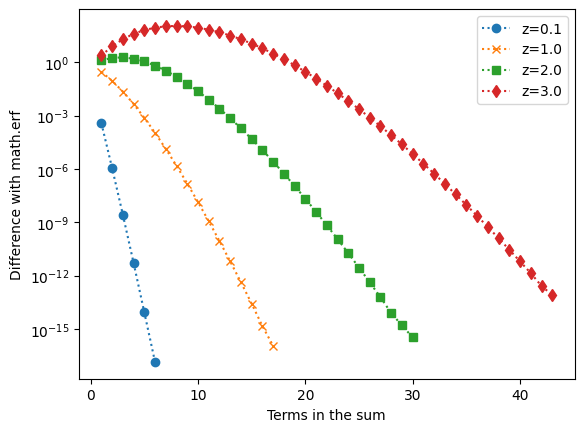

In [2]:
#############
# Functions #
#############
import math
import matplotlib.pyplot as pl

# calculates the taylor polynomial approximation of erf(z) up to N terms
def errfun(z, N):
    result = 0
    for n in range(N+1):
        # calculate each term of the series amnd add to result
        term = ((-1)**n * z**(2*n + 1)) / (math.factorial(n) * (2*n + 1))
        result += term
    return (2 / math.sqrt(math.pi)) * result
    

# generates a list of differences between the approximation and actual erf(z). increases N until the difference is smaller than eps
def ErrSequence(z, eps):
    difflist = []
    N = 0
    diff = float('inf')  
    while diff > eps:
        approx = errfun(z, N)
        exact = math.erf(z)
        # how far off are we?
        diff = abs(exact - approx)
        difflist.append(diff)
        N += 1
    # give back all the differences we found
    return difflist

###############
# MAIN SCRIPT #
###############

# gen lists of diff
z_values = [0.1, 1.0, 2.0, 3.0]
eps_values = [1e-15, 1e-15, 1e-15, 1e-13]
markers = [':o', ':x', ':s', ':d']  # Use different markers for each plot

for z, eps, marker in zip(z_values, eps_values, markers):
    difflist = ErrSequence(z, eps)
    pl.semilogy(range(1, len(difflist)+1), difflist, marker, label=f'z={z}')

# make + save plot
pl.xlabel('Terms in the sum')
pl.ylabel('Difference with math.erf')
pl.legend()
pl.savefig('erf_plot.pdf')
pl.show()